# Aula 2 - Agrupamento

### Desafio enfrentado

Uma empresa de **vendas online** quer aumentar a <u>satisfação dos seus clientes</u>.

Você já aprendeu, usando um modelo de classificação, que o <u>principal fator que faz um produto ser bem avaliado é o valor do frete</u>

Mas a empresa quer **mais**: Será que é possível criar <u>campanhas personalizada para os clientes, de acordo com a região de onde eles acessam?</u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib
font = {'size': 14}
matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('base_aula_2_agrupamento.csv')
df

,product_id,order_id,customer_id,order_purchase_timestamp,city,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,2018-05-20 18:45:21,RS_95,101.65,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,2018-08-10 13:24:35,RS_95,58.90,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
2,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,2018-08-01 22:00:33,RS_93,58.90,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
3,000d9be29b5207b54e86aa1b1ac54872,a6c1ae4d48280b5b3c43231ac6afd701,8cefa3f70ed73678ae31bd3ebf441aff,2018-04-03 09:24:12,SP_04,199.00,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0
4,001b237c0e9bb435f2e54071129237e9,a006aaefd88b5bb6c7ddcecc74916db3,26936078d32b04563ad9ee6611e31e4f,2018-08-09 01:24:57,SP_08,78.90,cama_mesa_banho,42.0,253.0,1.0,6000.0,40.0,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60451,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,839b3007f7e5aee8f8eb130c8fa51c29,2018-04-01 11:58:04,GO_75,29.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0
60452,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,d14930bf3da4e0ba5a02cc8d6ac80f6e,2018-04-19 10:12:12,MG_38,34.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0
60453,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,550ccac77275f9cdec4b6cd97ac118d0,2018-08-10 17:15:07,SP_04,34.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0
60454,fffdb2d0ec8d6a61f0a0a0db3f25b441,dd38c566a34ff9deb93ff05d7bd6d0aa,35e8f2cff4eeed925cfa42f6731a4425,2018-05-01 17:31:41,SP_03,34.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0


In [5]:
df.customer_id.value_counts()

be1b70680b9f9694d8c70f41fa3dc92b    20
a7693fba2ff9583c78751f2b66ecab9d    14
7d321bd4e8ba1caf74c4c1aabd9ae524    13
daf15f1b940cc6a72ba558f093dc00dd    12
3b54b5978e9ace64a63f90d176ffb158    12
                                    ..
992b4f232abcd759be707c69cba05805     1
64a86356e147cbebd00bda1953a413b8     1
b9359a2c2419370ec7136672ca021e0d     1
abad8dba5de22702ed59246b0f2455b7     1
1e1e5231546c0e67ff2dc6d3d563f085     1
Name: customer_id, Length: 52935, dtype: int64

In [7]:
(df.customer_id.value_counts() > 1).mean()

0.0991593463681874

In [8]:
df.product_category_name.value_counts()

beleza_saude                     5924
cama_mesa_banho                  5873
informatica_acessorios           4683
esporte_lazer                    4503
moveis_decoracao                 4098
                                 ... 
fashion_esporte                     5
la_cuisine                          4
pc_gamer                            4
fashion_roupa_infanto_juvenil       3
cds_dvds_musicais                   1
Name: product_category_name, Length: 72, dtype: int64

### Informações sobre essa base

 - Consolidação das compras ao longo de 2018
 
 
 - $90%$ dos usuários fizeram **uma única compra!**
   - Permite a compra de usuários não-logados
   - Uma mesma pessoa pode ter vários `customer_id`, sendi <u>impossível</u> agrupar corretamente o mesmo cliente
 
 
 - **$72$ categorias**. É muito!
 
 
 - O campo `city` é **muito estranho**

### O que está acontecendo com o campo `city`?

Em conversa com a área de negócio descobrimos que os números desse campo correspondem aos **dois primeiros dígitos do CEP de entrega**.

Mas que loucura! Por que queremos essa informação?

Por que os <u>correios dividem o país em zonas que fazem algum sentido!</u>

### Estrutura do CEP:
<img src="img/CEP_0.png" />

### Significado do primeiro dígito:
<img src="img/CEP_1.png" style='width:70%'/>

### Significado do segundo dígito:
<img src="img/CEP_2.png" style='width:70%'/>

Ref: https://www.correios.com.br/enviar-e-receber/ferramentas/cep/estrutura-do-cep

# Legal!

Então temos uma regionalização em um nível demográfico mais granular que a UF, e que já **agrupa cidades com perfil provável similar** (cidades próximas/vizinhas)

<hr/>

In [10]:
df.city.value_counts()

SP_13    4051
SP_04    2982
SP_05    2137
SP_06    1922
SP_03    1834
         ... 
PA_67      50
AP_68      43
AC_69      32
RR_69      27
BA_43      25
Name: city, Length: 104, dtype: int64

### Mas e as categorias??

Apesar dos modelos de agrupamento serem avançados, **não tem como tirar informações interpretáveis de variáveis demais**.

#### O que eu quero dizer com isso?

Uma das coisas que notaremos sobre modelos de agrupamento é que eles **SEMPRE** voltam grupos. Sempre, sempre, sempre. Se esses grupos fazem sentido, cabe a nós interpretarmos.

E como interpretar algo que consolidar informação de **72 informações distintas**?

Assim, tenham como regra geral em modelos de agrupamento:

<table><tr><td>
    <br/>
    <center><h1>Em agrupamento, NUNCA usem mais do que 1 ou 2 dezenas de variáveis</h1></center>
    <br/>
    <center><h1>Com mais de 10 a interpretação JÁ É desafiadora</h1></center>
    <br/>
</td></tr></table>

<hr />

Assim, vamos escolher só as categorias **mais prevalentes**

Para ilustrar nosso conceito, iremos pegar as categorias que correspondem à 80% das nossas vendas:

In [12]:
df.product_category_name.value_counts(normalize=True)

beleza_saude                     0.097989
cama_mesa_banho                  0.097145
informatica_acessorios           0.077461
esporte_lazer                    0.074484
moveis_decoracao                 0.067785
                                   ...   
fashion_esporte                  0.000083
la_cuisine                       0.000066
pc_gamer                         0.000066
fashion_roupa_infanto_juvenil    0.000050
cds_dvds_musicais                0.000017
Name: product_category_name, Length: 72, dtype: float64

In [13]:
df.product_category_name.value_counts(normalize=True).iloc[:12]

beleza_saude              0.097989
cama_mesa_banho           0.097145
informatica_acessorios    0.077461
esporte_lazer             0.074484
moveis_decoracao          0.067785
utilidades_domesticas     0.066495
relogios_presentes        0.061119
automotivo                0.043172
telefonia                 0.038540
ferramentas_jardim        0.030998
eletronicos               0.030650
bebes                     0.029129
Name: product_category_name, dtype: float64

In [14]:
df.product_category_name.value_counts(normalize=True).iloc[:12].sum()

0.7149662564509727

In [15]:
for n_cats in range(1,30):
    print(n_cats, df.product_category_name.value_counts(normalize=True).iloc[:n_cats].sum())

1 0.09798861982268096
2 0.19513365091967713
3 0.27259494508402804
4 0.3470788672753738
5 0.41486370252745797
6 0.48135834325790655
7 0.5424771734815402
8 0.5856490670901151
9 0.6241894931851264
10 0.6551872436151912
11 0.6858376339817388
12 0.7149662564509727
13 0.7418783908958582
14 0.7671033478893741
15 0.7914516342463941
16 0.8157006748709805
17 0.8348054783644303
18 0.8493946010321556
19 0.8639341008336641
20 0.8770676194256979
21 0.8857681619690352
22 0.893889771073177
23 0.9014986105597458
24 0.9083465660976578
25 0.9148967844382692
26 0.9211988884477967
27 0.9270378457059679
28 0.9322151647479158
29 0.9369624189493184


### Iremos pegar as <u>15 categorias mais prevalentes</u>

### Isso já é um número bem grande!

In [19]:
mais_frequentes = df.product_category_name.value_counts(normalize=True).iloc[:15].index
mais_frequentes

Index(['beleza_saude', 'cama_mesa_banho', 'informatica_acessorios',
       'esporte_lazer', 'moveis_decoracao', 'utilidades_domesticas',
       'relogios_presentes', 'automotivo', 'telefonia', 'ferramentas_jardim',
       'eletronicos', 'bebes', 'perfumaria', 'papelaria', 'brinquedos'],
      dtype='object')

# Mas Rafinha, o que fazemos com as outras?

In [22]:
def only_freq(row):
    if row.product_category_name not in mais_frequentes:
        return 'outros'
    else:
        return row.product_category_name
    
df.apply(only_freq,axis=1).value_counts(normalize=True)

outros                    0.208548
beleza_saude              0.097989
cama_mesa_banho           0.097145
informatica_acessorios    0.077461
esporte_lazer             0.074484
moveis_decoracao          0.067785
utilidades_domesticas     0.066495
relogios_presentes        0.061119
automotivo                0.043172
telefonia                 0.038540
ferramentas_jardim        0.030998
eletronicos               0.030650
bebes                     0.029129
perfumaria                0.026912
papelaria                 0.025225
brinquedos                0.024348
dtype: float64

In [23]:
df2 = df.copy()
df2.loc[:, 'product_category_name'] = df.apply(only_freq,axis=1)

df2

,product_id,order_id,customer_id,order_purchase_timestamp,city,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,2018-05-20 18:45:21,RS_95,101.65,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,2018-08-10 13:24:35,RS_95,58.90,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
2,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,2018-08-01 22:00:33,RS_93,58.90,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
3,000d9be29b5207b54e86aa1b1ac54872,a6c1ae4d48280b5b3c43231ac6afd701,8cefa3f70ed73678ae31bd3ebf441aff,2018-04-03 09:24:12,SP_04,199.00,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0
4,001b237c0e9bb435f2e54071129237e9,a006aaefd88b5bb6c7ddcecc74916db3,26936078d32b04563ad9ee6611e31e4f,2018-08-09 01:24:57,SP_08,78.90,cama_mesa_banho,42.0,253.0,1.0,6000.0,40.0,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60451,fffdb2d0ec8d6a61f0a0a0db3f25b441,a8159270bc9cf7d54450e079ba6b7232,839b3007f7e5aee8f8eb130c8fa51c29,2018-04-01 11:58:04,GO_75,29.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0
60452,fffdb2d0ec8d6a61f0a0a0db3f25b441,beaf95465b542dea76df78b2fb86a97a,d14930bf3da4e0ba5a02cc8d6ac80f6e,2018-04-19 10:12:12,MG_38,34.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0
60453,fffdb2d0ec8d6a61f0a0a0db3f25b441,d6c1ed12e8eeaa15e9d5c83c79598f85,550ccac77275f9cdec4b6cd97ac118d0,2018-08-10 17:15:07,SP_04,34.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0
60454,fffdb2d0ec8d6a61f0a0a0db3f25b441,dd38c566a34ff9deb93ff05d7bd6d0aa,35e8f2cff4eeed925cfa42f6731a4425,2018-05-01 17:31:41,SP_03,34.99,informatica_acessorios,47.0,501.0,5.0,150.0,16.0,4.0,13.0


In [24]:
df2.product_category_name.value_counts()

outros                    12608
beleza_saude               5924
cama_mesa_banho            5873
informatica_acessorios     4683
esporte_lazer              4503
moveis_decoracao           4098
utilidades_domesticas      4020
relogios_presentes         3695
automotivo                 2610
telefonia                  2330
ferramentas_jardim         1874
eletronicos                1853
bebes                      1761
perfumaria                 1627
papelaria                  1525
brinquedos                 1472
Name: product_category_name, dtype: int64

# Agora vamos "ajeitar" nossa base!

In [26]:
df2.head()

,product_id,order_id,customer_id,order_purchase_timestamp,city,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,2018-05-20 18:45:21,RS_95,101.65,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,2018-08-10 13:24:35,RS_95,58.90,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
2,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,2018-08-01 22:00:33,RS_93,58.90,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
3,000d9be29b5207b54e86aa1b1ac54872,a6c1ae4d48280b5b3c43231ac6afd701,8cefa3f70ed73678ae31bd3ebf441aff,2018-04-03 09:24:12,SP_04,199.00,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0
4,001b237c0e9bb435f2e54071129237e9,a006aaefd88b5bb6c7ddcecc74916db3,26936078d32b04563ad9ee6611e31e4f,2018-08-09 01:24:57,SP_08,78.90,cama_mesa_banho,42.0,253.0,1.0,6000.0,40.0,4.0,30.0


# Ponto-chave

In [28]:
df_piv = df2.pivot_table(
    index='city',
    columns='product_category_name',
    values='price',
    aggfunc='sum'
)

df_piv

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,outros,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas
city,,,,,,,,,,,,,,,,
AC_69,NaN,NaN,753.89,74.99,NaN,13.65,272.66,629.00,316.90,716.64,1030.20,129.90,NaN,428.00,839.99,109.18
AL_57,2290.73,473.97,4864.00,508.60,834.47,202.47,1519.69,490.59,2892.32,1273.28,12308.58,204.79,286.59,5726.53,1534.41,715.67
AM_69,687.90,417.99,2211.03,354.98,211.70,32.40,495.10,1787.90,1273.85,149.80,2683.71,467.49,44.99,629.66,353.95,59.90
AP_68,1017.39,NaN,289.99,199.99,NaN,13.65,812.69,210.00,1945.03,75.00,669.84,234.90,NaN,1531.80,114.88,312.50
BA_40,2115.06,662.80,3415.79,1389.21,1869.24,915.89,2744.08,435.19,1196.49,1635.99,8145.53,366.29,449.57,3780.02,2245.39,1486.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP_16,1400.23,3551.17,3586.77,507.64,3515.84,459.54,3241.17,1251.81,1709.36,3863.43,10983.47,861.46,1077.19,3838.79,1428.75,4069.75
SP_17,2611.80,1867.57,7140.81,2558.49,6060.40,730.00,6124.39,1829.05,7069.92,4698.20,17793.85,1749.19,2103.26,8053.46,2407.53,4320.09
SP_18,8254.59,6186.21,13676.09,4540.64,11187.94,1144.66,8846.71,4628.85,7623.37,7491.77,37780.41,4734.94,4339.83,10033.44,3528.57,7373.44


### O que são esses NaN?

 - São cidades que **não tiveram consumo** nessa categoria
 
**Nesse caso** podemos preencher esses valores com 0

# Cuidado!

**Sempre** <u>entenda o racional</u> por trás no NaNs

In [29]:
df_piv = df_piv.fillna(0)
df_piv

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,outros,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas
city,,,,,,,,,,,,,,,,
AC_69,0.00,0.00,753.89,74.99,0.00,13.65,272.66,629.00,316.90,716.64,1030.20,129.90,0.00,428.00,839.99,109.18
AL_57,2290.73,473.97,4864.00,508.60,834.47,202.47,1519.69,490.59,2892.32,1273.28,12308.58,204.79,286.59,5726.53,1534.41,715.67
AM_69,687.90,417.99,2211.03,354.98,211.70,32.40,495.10,1787.90,1273.85,149.80,2683.71,467.49,44.99,629.66,353.95,59.90
AP_68,1017.39,0.00,289.99,199.99,0.00,13.65,812.69,210.00,1945.03,75.00,669.84,234.90,0.00,1531.80,114.88,312.50
BA_40,2115.06,662.80,3415.79,1389.21,1869.24,915.89,2744.08,435.19,1196.49,1635.99,8145.53,366.29,449.57,3780.02,2245.39,1486.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP_16,1400.23,3551.17,3586.77,507.64,3515.84,459.54,3241.17,1251.81,1709.36,3863.43,10983.47,861.46,1077.19,3838.79,1428.75,4069.75
SP_17,2611.80,1867.57,7140.81,2558.49,6060.40,730.00,6124.39,1829.05,7069.92,4698.20,17793.85,1749.19,2103.26,8053.46,2407.53,4320.09
SP_18,8254.59,6186.21,13676.09,4540.64,11187.94,1144.66,8846.71,4628.85,7623.37,7491.77,37780.41,4734.94,4339.83,10033.44,3528.57,7373.44


In [31]:
df_piv.mean().sort_values(ascending=False)

product_category_name
outros                    17849.592212
beleza_saude               7403.873173
relogios_presentes         6810.634135
cama_mesa_banho            5168.405096
esporte_lazer              5097.905577
informatica_acessorios     4831.077788
utilidades_domesticas      3823.923654
moveis_decoracao           3704.923173
automotivo                 3333.004231
bebes                      2462.372115
ferramentas_jardim         2062.676250
telefonia                  1728.380192
perfumaria                 1701.392404
brinquedos                 1631.833365
papelaria                  1302.583846
eletronicos                 971.157596
dtype: float64

### E quais são as regiões que mais consomem?

In [32]:
df_piv.mean(axis=1).sort_values(ascending=False)

city
SP_13    28177.906250
SP_04    19677.775000
SP_05    14518.143750
RJ_22    13614.245000
SP_03    12125.571250
             ...     
CE_61      475.855000
AP_68      464.228750
RR_69      373.506875
AC_69      332.187500
BA_43      164.856250
Length: 104, dtype: float64

### Só a título de curiosidade, as primeiras 3 são:
 - Região de Campinas
 - Dos bairros da Vila Mariana até Guarapiranga na cidade de São Paulo
 - Dos bairros da Lapa até o Capão redondo na cidade de São Paulo

# Finalmente!

# Aqui começa o agrupamento

### Objetivo:
<table><tr><td>
    <center><h3>Agrupar regiões com consumo similar</h3></center>
</td></tr></table>

### Problema:
<table><tr><td>
    <center><h3>Algumas regiões consomem MUITO mais que outras.<br/>Precisamos <u>normalizar</u> o consumo</h3></center>
</td></tr></table>

In [33]:
df_piv.head()

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,outros,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas
city,,,,,,,,,,,,,,,,
AC_69,0.00,0.00,753.89,74.99,0.00,13.65,272.66,629.00,316.90,716.64,1030.20,129.90,0.00,428.00,839.99,109.18
AL_57,2290.73,473.97,4864.00,508.60,834.47,202.47,1519.69,490.59,2892.32,1273.28,12308.58,204.79,286.59,5726.53,1534.41,715.67
AM_69,687.90,417.99,2211.03,354.98,211.70,32.40,495.10,1787.90,1273.85,149.80,2683.71,467.49,44.99,629.66,353.95,59.90
AP_68,1017.39,0.00,289.99,199.99,0.00,13.65,812.69,210.00,1945.03,75.00,669.84,234.90,0.00,1531.80,114.88,312.50
BA_40,2115.06,662.80,3415.79,1389.21,1869.24,915.89,2744.08,435.19,1196.49,1635.99,8145.53,366.29,449.57,3780.02,2245.39,1486.49


<img src="img/cluster_desejado.png" style='width:40%; float:left; padding:40px;'/>

Nosso **objetivo** é representar as regiões por **pontos** em um **espaço de consumo**, de forma que **cidades parecidas ficam proximas**:

Note, estamos fazendo uma relação:

<center>$semelhança \leftrightarrow distância$</center>

### Essa relação é valida <u>em todos os métodos de agrupamento</u>! Sejam eles simples ou complexos!

<hr />

Como isso fica no nosso problema?

Vamos pegar 2 variáveis para ilustrar nosso ponto:

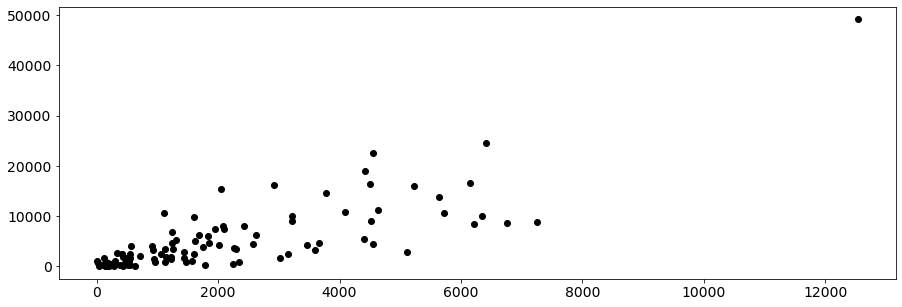

In [34]:
plt.figure(figsize=(15,5))
plt.plot( df_piv.ferramentas_jardim, df_piv.cama_mesa_banho, 'ko')

Note que se formos trabalhar por distância, **cidades menores, com consumo total menor ficam próximas**

Enquanto **uma única cidade com gasto muito elevado tende a ficar <u>sozinha</u>**

<hr />

Como podemos trabalhar isso?

Vamos olhar para a **proporção de gastos**

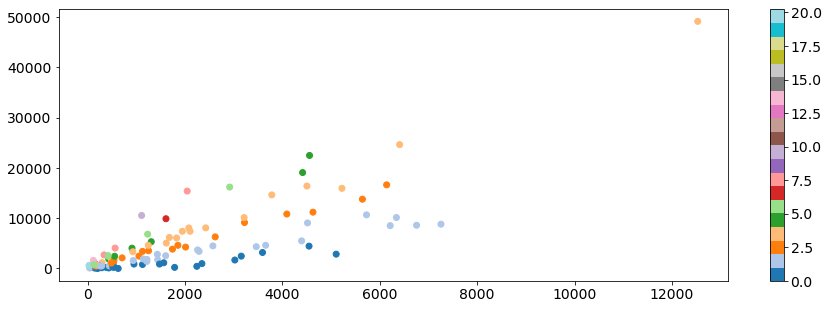

In [38]:
x = df_piv.ferramentas_jardim
y = df_piv.cama_mesa_banho
c = y/x

plt.figure(figsize=(15,5))
plt.scatter( x, y, c=y/x, cmap='tab20')
plt.colorbar()

Assim, cidades com **proporções de consumo próximas** estão **pintadas da mesma cor**

# Como podemos traduzir isso em distância?

Vamos **"jogar fora a distância da origem"**!

Vamos <u>DIVIDIR CADA COORDENADA PELA DISTÂNCIA DO PONTO DA ORIGEM</u>
    
**Nota:** Em álgebra linear isso é chamado de **normalização de vetores**

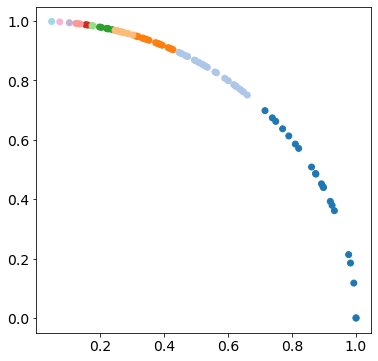

In [41]:
x = df_piv.ferramentas_jardim
y = df_piv.cama_mesa_banho
c = y/x

x2 = x / np.sqrt( (x**2+y**2) )
y2 = y / np.sqrt( (x**2+y**2) )

plt.figure(figsize=(6,6))
plt.scatter( x2,y2,c=c, cmap='tab20')

Agora estão na superfície de uma esfera!!!

Note que, agora,

# Cidades com <u>PROPORÇÕES DE CONSUMO</u> parecidas ficam próximas, <u>independente do valor absoluto</u>!

<img src='img/dist_cosseno.png' style='width:40%; float:left; padding:40px;' />

E isso se chama:

<h1>Distância cosseno</h1>

pois a nossa distância está olhando só para o **ângulo** do espaço original.

In [42]:
df_piv.head()

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,outros,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas
city,,,,,,,,,,,,,,,,
AC_69,0.00,0.00,753.89,74.99,0.00,13.65,272.66,629.00,316.90,716.64,1030.20,129.90,0.00,428.00,839.99,109.18
AL_57,2290.73,473.97,4864.00,508.60,834.47,202.47,1519.69,490.59,2892.32,1273.28,12308.58,204.79,286.59,5726.53,1534.41,715.67
AM_69,687.90,417.99,2211.03,354.98,211.70,32.40,495.10,1787.90,1273.85,149.80,2683.71,467.49,44.99,629.66,353.95,59.90
AP_68,1017.39,0.00,289.99,199.99,0.00,13.65,812.69,210.00,1945.03,75.00,669.84,234.90,0.00,1531.80,114.88,312.50
BA_40,2115.06,662.80,3415.79,1389.21,1869.24,915.89,2744.08,435.19,1196.49,1635.99,8145.53,366.29,449.57,3780.02,2245.39,1486.49


In [44]:
df_piv_normed = df_piv.drop('outros',axis=1)
df_piv_normed = df_piv_normed.div( (df_piv_normed**2).sum(axis=1)**0.50, axis=0 )
df_piv_normed.head()

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas
city,,,,,,,,,,,,,,,
AC_69,0.000000,0.000000,0.469743,0.046726,0.000000,0.008505,0.169892,0.391925,0.197458,0.446532,0.080940,0.000000,0.266683,0.523391,0.068029
AL_57,0.258634,0.053513,0.549167,0.057423,0.094215,0.022860,0.171580,0.055390,0.326556,0.143759,0.023122,0.032357,0.646551,0.173242,0.080802
AM_69,0.202488,0.123038,0.650832,0.104491,0.062315,0.009537,0.145736,0.526281,0.374967,0.044095,0.137609,0.013243,0.185345,0.104188,0.017632
AP_68,0.356046,0.000000,0.101485,0.069988,0.000000,0.004777,0.284409,0.073492,0.680683,0.026247,0.082206,0.000000,0.536069,0.040203,0.109362
BA_40,0.281267,0.088141,0.454241,0.184741,0.248577,0.121798,0.364916,0.057873,0.159113,0.217559,0.048710,0.059785,0.502678,0.298598,0.197678


In [45]:
(df_piv_normed**2).sum(axis=1)

city
AC_69    1.0
AL_57    1.0
AM_69    1.0
AP_68    1.0
BA_40    1.0
        ... 
SP_16    1.0
SP_17    1.0
SP_18    1.0
SP_19    1.0
TO_77    1.0
Length: 104, dtype: float64

# Agora podemos finalmente usar nosso método de agrupamento!

In [47]:
X.head()

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas
city,,,,,,,,,,,,,,,
AC_69,0.000000,0.000000,0.469743,0.046726,0.000000,0.008505,0.169892,0.391925,0.197458,0.446532,0.080940,0.000000,0.266683,0.523391,0.068029
AL_57,0.258634,0.053513,0.549167,0.057423,0.094215,0.022860,0.171580,0.055390,0.326556,0.143759,0.023122,0.032357,0.646551,0.173242,0.080802
AM_69,0.202488,0.123038,0.650832,0.104491,0.062315,0.009537,0.145736,0.526281,0.374967,0.044095,0.137609,0.013243,0.185345,0.104188,0.017632
AP_68,0.356046,0.000000,0.101485,0.069988,0.000000,0.004777,0.284409,0.073492,0.680683,0.026247,0.082206,0.000000,0.536069,0.040203,0.109362
BA_40,0.281267,0.088141,0.454241,0.184741,0.248577,0.121798,0.364916,0.057873,0.159113,0.217559,0.048710,0.059785,0.502678,0.298598,0.197678


In [46]:
from sklearn.cluster import AgglomerativeClustering

# NUNCA, NUNCA, NUNCA faça desse jeito
model = AgglomerativeClustering()

X = df_piv_normed.copy()
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

# Ok, mas o que isso significa?

Ele classificou cada amostra nossa como pertencendo a 2 possíveis clusters:
 - Cluster 0
 - Cluster 1
 
Mas por que 2????

Simplesmente porque esse é o padrão. E não, esse número não faz sentido.

Assim como os modelos de classificação, SEMPRE devemos olhar a documentação de um método antes de utilizá-lo:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

# Mas por que esse tal de AgglomerativeClustering?

Realmente, há MUITOS métodos de agrupamento disponíveis. E assim como em classificação, cada um deles tem seus prós e contras, suas características próprias e sua própria forma de gerar *insights*.

Esse método, em particular, está dentro dos métodos de **agrupamento hierárquico**.

Isso quer dizer que, além de agrupar, ele nos mostra <u>a estrutura dos dados</u>.

**"Mas Rafinha, o que você quer dizer com estrutura"**

Olha só abaixo, com esse código que eu <u>adaptei da própria página do scikit-learn</u>

Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

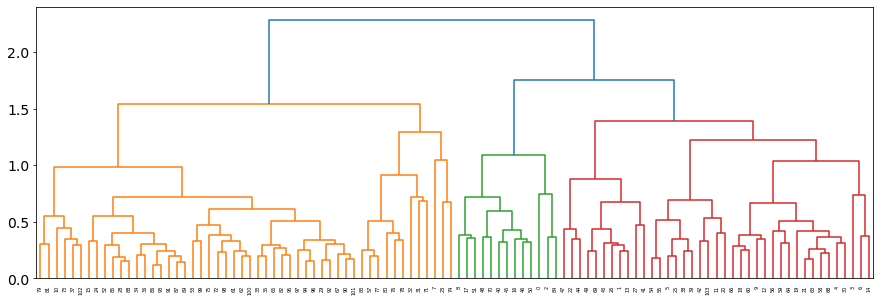

In [48]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X = df_piv_normed.copy()
model = model.fit(X)
plt.figure(figsize=(15,5))
plot_dendrogram(model, truncate_mode='level', p=20)

# Lindo! Mas pra quê serve?

Esse gráfico acima mostra a **distância de todos os pontos**. Como?

 - Na base do gráfico, em $y=0$, eu tenho cada um das $104$ regiões de CEP da minha base.
 - Par a par, ele encontra **o par ponto mais próximo** e **os conecta**, formando a primeira ligação.
   - Note que, com essa ligação, transformamos um **cluster de um elemento** em um **cluster de 2 elementos**
   - A <u>altura dessa ligação</u> é dada justamente pela <u>distância</u> desses pontos
 - Então ele repete isso, encontrando a ligação que junta **mais aproxima um cluster do outro**. Seja ele de $1$, $2$ ou mais elementos
 - E isso é repetido até chegar no topo, onde temos **um único cluster que contém todos os dados**
 
<hr/>

Mas, se você for atento há uma nuance:

**Como medir a distância de um cluster para outro**.

Há várias formas, chamadas de <span style="font-size: 28px;">Linkage</span>:

 - `average`: Olhamos para a **distância média entre todos os pontos**
 
 
 - `complete` ou `maximum`: Olhamos para a **maior distância possível entre os clusters**
 
 
 - `single`: Olhamos para a **menor distância possível entre os clusters**
 
 
 - `ward` (**método que usamos aqui**): Ao invés de olharmos para a distância diretamente, buscamos a **conexão que vai minimizar a variância do cluster**, i.e., aquela que torna os pontos mais homogeneamente distribuídos do centro do cluster.
   - Para implementar esse método, é feita uma distância ponderada entre todos os pontos dos clusters, chamada *algorítmo de Lance–Williams*
   - Assim, a altura continua sendo dada por <u>"um tipo de distância média"</u>
   
<hr />

<img src="img/vazio_cluster.png" style="width:50%; float: left; padding: 50px;">

<div style="width:50%; float: right;">

### E olha que legal!

Não temos como saber, de cara, quantos clusters vamos/queremos encontrar.

Mas, intuitivamente, a noção de cluster, de agrupamento, é justamente diversos **grupos de pontos próximos, separados entre si por um vazio**.

E esse método mostra pra gente <u>justamente os espaços vazios entre grupos</u>!

Um método decidir a quantidade de clusters de um grupo é justamente encontrar, no agrupamento hierárquico, **<u>um corte horizontal, que separa grandes distâncias</u>**

</div>

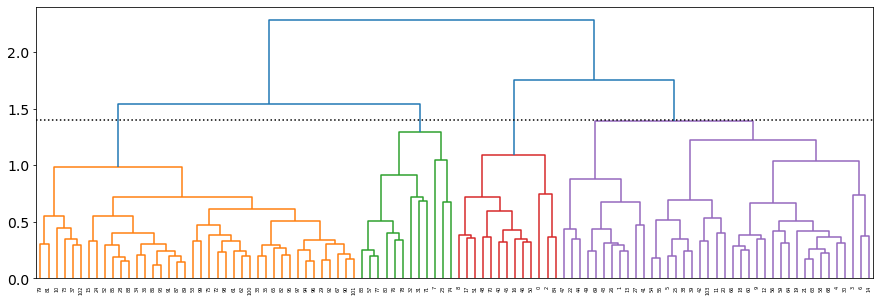

In [49]:
plt.figure(figsize=(15,5))
plot_dendrogram(model, truncate_mode='level', p=20,color_threshold=1.4)
plt.axhline(1.4,color='k',linestyle=':')

### Colocando, por exemplo, um corte em $1.4$, encontramos $4$ clusters

# Mas cuidado!

Às vezes ficamos tentados a colocar o corte muito baixo "para podermos ver os detalhes de cada grupo".

Lembre-se:

<div style="width:100%; text-align: center;">
    <center><h3>"Quanto mais clusters, mais difícil é interpretar, a mais complexo será o uso pela área de negócio"</h3></center>
</div>

<hr/>

Por hora, vamos seguir com nosso $4$ clusters para entendermos:

In [51]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.4)

X = df_piv_normed.copy()
clust = model.fit_predict(X)
clust

array([2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 3, 3, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 3, 0, 0, 2, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0], dtype=int64)

### Para facilitar a análise, vamos incorporar esses clusters na própria tabela:

In [52]:
X_pred = X.copy()
X_pred.loc[:,'clust'] = clust
X_pred

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas,clust
city,,,,,,,,,,,,,,,,
AC_69,0.000000,0.000000,0.469743,0.046726,0.000000,0.008505,0.169892,0.391925,0.197458,0.446532,0.080940,0.000000,0.266683,0.523391,0.068029,2
AL_57,0.258634,0.053513,0.549167,0.057423,0.094215,0.022860,0.171580,0.055390,0.326556,0.143759,0.023122,0.032357,0.646551,0.173242,0.080802,0
AM_69,0.202488,0.123038,0.650832,0.104491,0.062315,0.009537,0.145736,0.526281,0.374967,0.044095,0.137609,0.013243,0.185345,0.104188,0.017632,2
AP_68,0.356046,0.000000,0.101485,0.069988,0.000000,0.004777,0.284409,0.073492,0.680683,0.026247,0.082206,0.000000,0.536069,0.040203,0.109362,0
BA_40,0.281267,0.088141,0.454241,0.184741,0.248577,0.121798,0.364916,0.057873,0.159113,0.217559,0.048710,0.059785,0.502678,0.298598,0.197678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP_16,0.136370,0.345852,0.349319,0.049440,0.342411,0.044755,0.315661,0.121915,0.166476,0.376263,0.083898,0.104909,0.373864,0.139147,0.396357,3
SP_17,0.147201,0.105256,0.402455,0.144196,0.341563,0.041143,0.345169,0.103085,0.398459,0.264790,0.098584,0.118539,0.453891,0.135688,0.243479,3
SP_18,0.280954,0.210555,0.465481,0.154546,0.380794,0.038960,0.301108,0.157548,0.259470,0.254991,0.161159,0.147711,0.341500,0.120099,0.250963,3


# Primeiro ponto importante: Volumetria dos clusters.

> - Será que um dos grupos tem todo mundo, e os outros são muito pequenos?
>   - Nesse caso não aprendemos nada! Só separamos um pedacinho minúsculo da base!

In [53]:
X_pred.clust.value_counts(normalize=True)

3    0.384615
0    0.375000
2    0.125000
1    0.115385
Name: clust, dtype: float64

# Segundo ponto importante: Eles fazem sentido?

> - Para "entender" os clusters, podemos observar quais são **as médias de cada variável**, dentro de <u>cada cluster</u>:

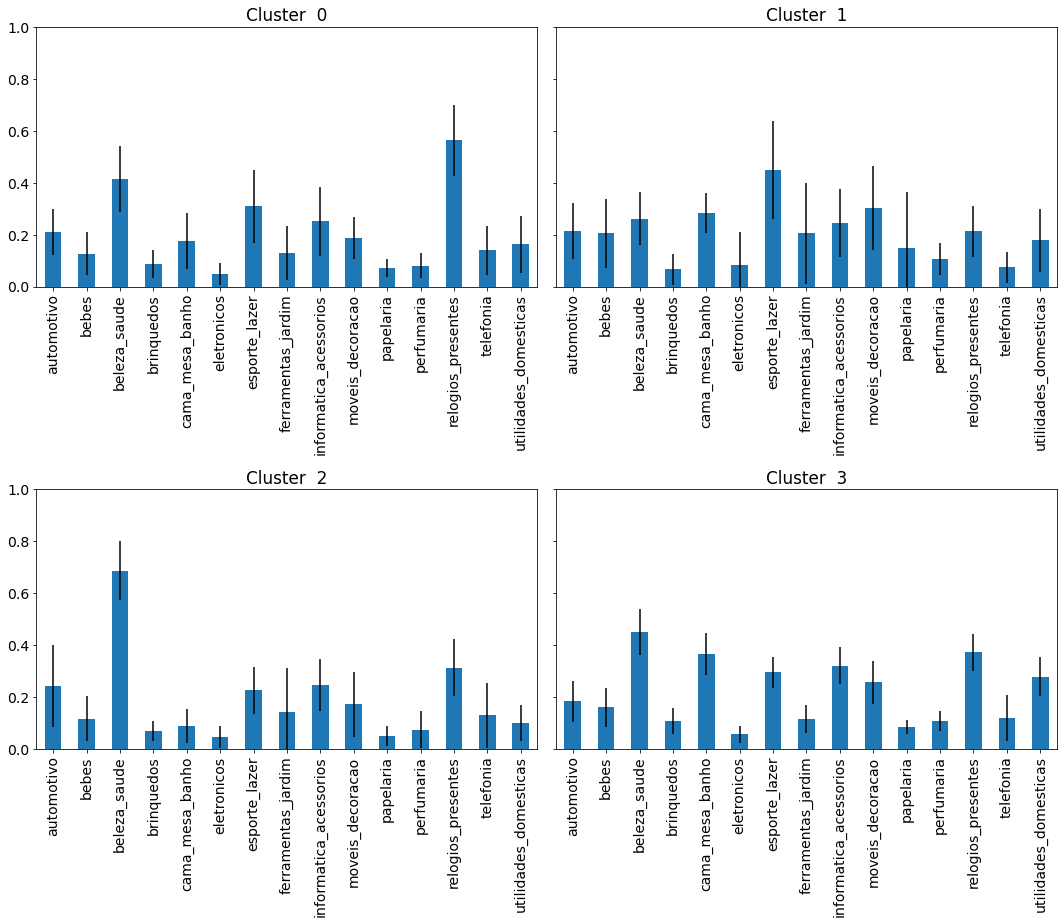

In [54]:
plt.figure(figsize=(15,5*6))

ax1  = plt.subplot(5,2, 1)
ax2  = plt.subplot(5,2, 2, sharey=ax1)
ax3  = plt.subplot(5,2, 3, sharey=ax1)
ax4  = plt.subplot(5,2, 4, sharey=ax1)

X_pred.loc[X_pred.clust== 0].mean().iloc[:-1].sort_index().plot(kind='bar',  ax=ax1, title='Cluster  0', yerr=X_pred.loc[X_pred.clust== 0].std())
X_pred.loc[X_pred.clust== 1].mean().iloc[:-1].sort_index().plot(kind='bar',  ax=ax2, title='Cluster  1', yerr=X_pred.loc[X_pred.clust== 1].std())
X_pred.loc[X_pred.clust== 2].mean().iloc[:-1].sort_index().plot(kind='bar',  ax=ax3, title='Cluster  2', yerr=X_pred.loc[X_pred.clust== 2].std())
X_pred.loc[X_pred.clust== 3].mean().iloc[:-1].sort_index().plot(kind='bar',  ax=ax4, title='Cluster  3', yerr=X_pred.loc[X_pred.clust== 3].std())

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

ax1.set_ylim(0,1)

plt.tight_layout()

# Terceiro ponto importante: Dê nomes!

Isso deixa mais fácil tanto para você entender, quando para o uso pela área de negócio

In [55]:
clust_names = {
    0: 'Presenteador',
    1: 'Esportista',
    2: 'Saúde',
    3: 'Casa'
}

In [56]:
X_pred.loc[:,'clust'] = X_pred.clust.replace(clust_names)
X_pred

product_category_name,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas,clust
city,,,,,,,,,,,,,,,,
AC_69,0.000000,0.000000,0.469743,0.046726,0.000000,0.008505,0.169892,0.391925,0.197458,0.446532,0.080940,0.000000,0.266683,0.523391,0.068029,Saúde
AL_57,0.258634,0.053513,0.549167,0.057423,0.094215,0.022860,0.171580,0.055390,0.326556,0.143759,0.023122,0.032357,0.646551,0.173242,0.080802,Presenteador
AM_69,0.202488,0.123038,0.650832,0.104491,0.062315,0.009537,0.145736,0.526281,0.374967,0.044095,0.137609,0.013243,0.185345,0.104188,0.017632,Saúde
AP_68,0.356046,0.000000,0.101485,0.069988,0.000000,0.004777,0.284409,0.073492,0.680683,0.026247,0.082206,0.000000,0.536069,0.040203,0.109362,Presenteador
BA_40,0.281267,0.088141,0.454241,0.184741,0.248577,0.121798,0.364916,0.057873,0.159113,0.217559,0.048710,0.059785,0.502678,0.298598,0.197678,Presenteador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP_16,0.136370,0.345852,0.349319,0.049440,0.342411,0.044755,0.315661,0.121915,0.166476,0.376263,0.083898,0.104909,0.373864,0.139147,0.396357,Casa
SP_17,0.147201,0.105256,0.402455,0.144196,0.341563,0.041143,0.345169,0.103085,0.398459,0.264790,0.098584,0.118539,0.453891,0.135688,0.243479,Casa
SP_18,0.280954,0.210555,0.465481,0.154546,0.380794,0.038960,0.301108,0.157548,0.259470,0.254991,0.161159,0.147711,0.341500,0.120099,0.250963,Casa


# Uma análise legal!

# Geolocalização

In [57]:
X_pred = X_pred.reset_index()
X_pred

product_category_name,city,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas,clust
0,AC_69,0.000000,0.000000,0.469743,0.046726,0.000000,0.008505,0.169892,0.391925,0.197458,0.446532,0.080940,0.000000,0.266683,0.523391,0.068029,Saúde
1,AL_57,0.258634,0.053513,0.549167,0.057423,0.094215,0.022860,0.171580,0.055390,0.326556,0.143759,0.023122,0.032357,0.646551,0.173242,0.080802,Presenteador
2,AM_69,0.202488,0.123038,0.650832,0.104491,0.062315,0.009537,0.145736,0.526281,0.374967,0.044095,0.137609,0.013243,0.185345,0.104188,0.017632,Saúde
3,AP_68,0.356046,0.000000,0.101485,0.069988,0.000000,0.004777,0.284409,0.073492,0.680683,0.026247,0.082206,0.000000,0.536069,0.040203,0.109362,Presenteador
4,BA_40,0.281267,0.088141,0.454241,0.184741,0.248577,0.121798,0.364916,0.057873,0.159113,0.217559,0.048710,0.059785,0.502678,0.298598,0.197678,Presenteador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,SP_16,0.136370,0.345852,0.349319,0.049440,0.342411,0.044755,0.315661,0.121915,0.166476,0.376263,0.083898,0.104909,0.373864,0.139147,0.396357,Casa
100,SP_17,0.147201,0.105256,0.402455,0.144196,0.341563,0.041143,0.345169,0.103085,0.398459,0.264790,0.098584,0.118539,0.453891,0.135688,0.243479,Casa
101,SP_18,0.280954,0.210555,0.465481,0.154546,0.380794,0.038960,0.301108,0.157548,0.259470,0.254991,0.161159,0.147711,0.341500,0.120099,0.250963,Casa
102,SP_19,0.165455,0.091832,0.362847,0.074868,0.412259,0.005008,0.272952,0.111879,0.537826,0.258489,0.092894,0.060006,0.266154,0.263215,0.247996,Casa


In [58]:
X_pred.loc[:,'UF'] = X_pred.city.apply(lambda x: x.split('_')[0])
X_pred

product_category_name,city,automotivo,bebes,beleza_saude,brinquedos,cama_mesa_banho,eletronicos,esporte_lazer,ferramentas_jardim,informatica_acessorios,moveis_decoracao,papelaria,perfumaria,relogios_presentes,telefonia,utilidades_domesticas,clust,UF
0,AC_69,0.000000,0.000000,0.469743,0.046726,0.000000,0.008505,0.169892,0.391925,0.197458,0.446532,0.080940,0.000000,0.266683,0.523391,0.068029,Saúde,AC
1,AL_57,0.258634,0.053513,0.549167,0.057423,0.094215,0.022860,0.171580,0.055390,0.326556,0.143759,0.023122,0.032357,0.646551,0.173242,0.080802,Presenteador,AL
2,AM_69,0.202488,0.123038,0.650832,0.104491,0.062315,0.009537,0.145736,0.526281,0.374967,0.044095,0.137609,0.013243,0.185345,0.104188,0.017632,Saúde,AM
3,AP_68,0.356046,0.000000,0.101485,0.069988,0.000000,0.004777,0.284409,0.073492,0.680683,0.026247,0.082206,0.000000,0.536069,0.040203,0.109362,Presenteador,AP
4,BA_40,0.281267,0.088141,0.454241,0.184741,0.248577,0.121798,0.364916,0.057873,0.159113,0.217559,0.048710,0.059785,0.502678,0.298598,0.197678,Presenteador,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,SP_16,0.136370,0.345852,0.349319,0.049440,0.342411,0.044755,0.315661,0.121915,0.166476,0.376263,0.083898,0.104909,0.373864,0.139147,0.396357,Casa,SP
100,SP_17,0.147201,0.105256,0.402455,0.144196,0.341563,0.041143,0.345169,0.103085,0.398459,0.264790,0.098584,0.118539,0.453891,0.135688,0.243479,Casa,SP
101,SP_18,0.280954,0.210555,0.465481,0.154546,0.380794,0.038960,0.301108,0.157548,0.259470,0.254991,0.161159,0.147711,0.341500,0.120099,0.250963,Casa,SP
102,SP_19,0.165455,0.091832,0.362847,0.074868,0.412259,0.005008,0.272952,0.111879,0.537826,0.258489,0.092894,0.060006,0.266154,0.263215,0.247996,Casa,SP


# Quarto ponto importante: Como eles se distribuem em outras variáveis de interesse?

> - Um padrão que faz sentido **real** não é interpretável só dentro daquilo que entrou explicitamente
>   - Ele nos permite **entender <u>outras variáveis</u>**

In [63]:
aux = X_pred.groupby(['UF','clust']).city.count().reset_index().pivot_table(
    index='UF',
    columns='clust',
    values='city',
    aggfunc='sum'
).fillna(0)

aux

clust,Casa,Esportista,Presenteador,Saúde
UF,,,,
AC,0.0,0.0,0.0,1.0
AL,0.0,0.0,1.0,0.0
AM,0.0,0.0,0.0,1.0
AP,0.0,0.0,1.0,0.0
BA,1.0,1.0,6.0,1.0
CE,1.0,0.0,2.0,1.0
DF,0.0,0.0,3.0,1.0
ES,0.0,0.0,1.0,0.0
GO,1.0,1.0,3.0,0.0


In [65]:
aux = aux.div(aux.sum(axis=1), axis=0)
aux

clust,Casa,Esportista,Presenteador,Saúde
UF,,,,
AC,0.000000,0.000000,0.000000,1.000000
AL,0.000000,0.000000,1.000000,0.000000
AM,0.000000,0.000000,0.000000,1.000000
AP,0.000000,0.000000,1.000000,0.000000
BA,0.111111,0.111111,0.666667,0.111111
CE,0.250000,0.000000,0.500000,0.250000
DF,0.000000,0.000000,0.750000,0.250000
ES,0.000000,0.000000,1.000000,0.000000
GO,0.200000,0.200000,0.600000,0.000000


(-0.5, 33.0)

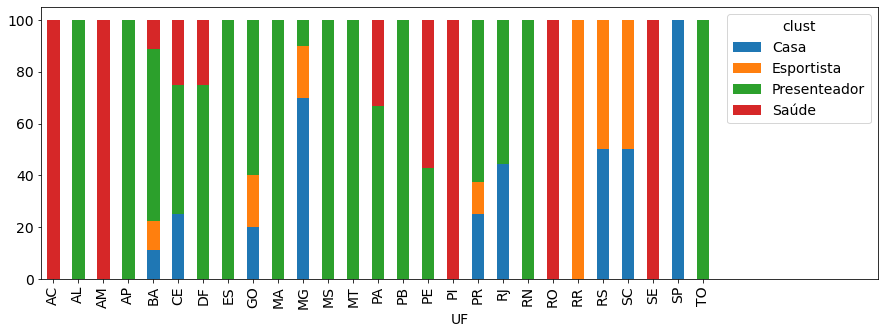

In [67]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
(100*aux).plot(kind='bar', stacked=True, ax=ax)
plt.xlim(right=33)

(-0.5, 30.0)

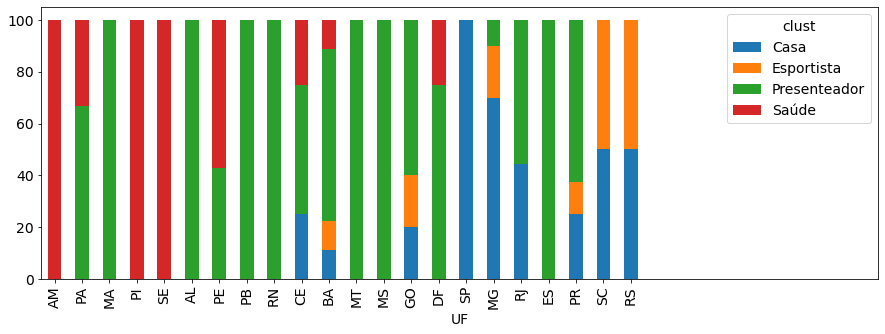

In [68]:
ordem_estados = [
    # Norte
    #'AC','RO','RR','AP','TO',
    'AM','PA',
    # Nordeste
    'MA','PI','SE','AL','PE','PB','RN','CE','BA',
    # Centro-Oeste
    'MT','MS','GO','DF',
    # Sudeste
    'SP','MG','RJ','ES',
    # Sul
    'PR','SC','RS',
]

plt.figure(figsize=(15,5))
ax = plt.subplot(111)
(100*aux.loc[ordem_estados,:]).plot(kind='bar', stacked=True,ax=ax)
plt.xlim(right=30)

# Otimização de logística